# Effect of bad labels

How many bad labels does it take to ruin a model?

In [1]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=2000,
                           n_features=20,
                           n_informative=2,
                           n_classes=2,
                           random_state=42
                          )

Split the data.

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Make a function that randomly flips classes with some probability.

Keep it simple for now with binary classes.

In [3]:
import numpy as np

def flip(y, p=0.01, random_state=42):
    """
    Flip y class with probability of p.
    """
    rng = np.random.default_rng(random_state)
    y_ = y.copy()
    for i, yi in enumerate(y_):
        if rng.binomial(1, p):
            y_[i] = 0 if yi else 1  # Flip.
    return y_

Gradually increase the proportion of flipped classes. Train a model for each proportion and score it with F1 and AUC.

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

probs = [0.005, 0.01, 0.02, 0.04, 0.08, 0.16, 0.32]

scores, aucs = [], []
for p in probs:
    model = KNeighborsClassifier()
    y_ = flip(y_train, p)
    model.fit(X_train, y_)
    y_prob = model.predict_proba(X_test)
    y_hat = model.predict(X_test)
    scores.append(f1_score(y_test, y_hat))
    aucs.append(roc_auc_score(y_test, y_prob[:, 1]))

Plot the result.

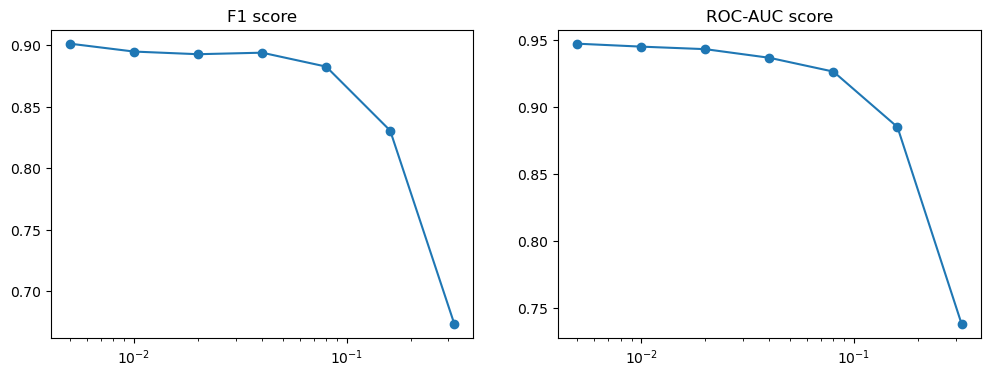

In [5]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=2, figsize=(12, 4))
axs[0].plot(probs, scores, 'o-')
axs[0].set_xscale('log')
axs[0].set_title('F1 score')
axs[1].plot(probs, aucs, 'o-')
axs[1].set_xscale('log')
axs[1].set_title('ROC-AUC score')
plt.show()

The more bad labels, the worse things get. Not surprising.

## Questions

- What is the effect of more, or fewer, samples?
- Is the behviour any different for multiclass tasks?
- What is the effect of wrong labels on minority classes?
- What if you repeat the experiments on real data?

---

&copy; 2023 Matt Hall, licensed CC BY